# Статистика наизусть  - 2

В данной статье я расскажу о Центральной предельной теореме, доверительных интервалах и проверке гипотез. Так же рассмотрим вычисление и интерпретацию p-value. Начнем с теоремы.

[Центральная предельная теорема](https://ru.wikipedia.org/wiki/Центральная_предельная_теорема) гласит о том, что при увеличении размера выборки средние по выбоке начинают подчиняться нормальному закону распределения, а само среднее по выборке начинает стремиться к среднему по совокупности. Давайте проведем несколько экспериментов и посмотрим, как это работает.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import random
from math import sqrt
%matplotlib inline
np.random.seed(1)

Создадим следующую равномерно распределенную совокупность. 

In [2]:
p = []
for i in range(1,6):
    p += [i]*20
p = np.array(p)
p

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5])

(array([  0.,  20.,  20.,  20.,  20.,  20.,   0.]),
 array([-1.        ,  0.14285714,  1.28571429,  2.42857143,  3.57142857,
         4.71428571,  5.85714286,  7.        ]),
 <a list of 7 Patch objects>)

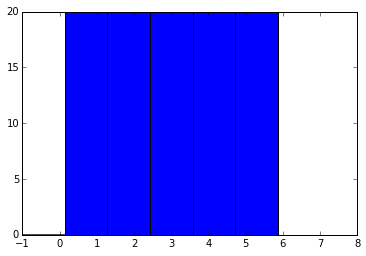

In [3]:
plt.hist(p,np.linspace(-1,7,8))

И так у нас есть равномерно распределенная совокупность из 100 элементов - числа от 1 до 5 каждое взятое по 20 раз. А теперь давайте представим, что мы будем делать выборки по два элемента за раз. Какие будут все возможные уникальные перестановки?

In [4]:
from itertools import permutations
perm = set(list(permutations(p,2)))
perm

{(1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4),
 (4, 5),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 5)}

Получается, что это все возможные варианты выборок по два элемента из этой совокупности. Давайте расчитаем среднее по по каждой выборке и посмотрим на распределения частот.

(array([ 0.  ,  0.  ,  0.04,  0.08,  0.12,  0.16,  0.2 ,  0.16,  0.12,
         0.08,  0.04,  0.  ]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
         5.5,  6. ]),
 <a list of 12 Patch objects>)

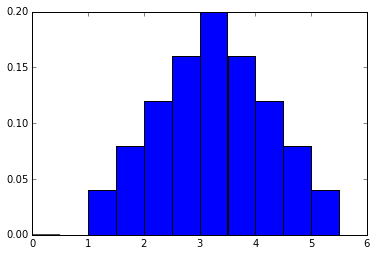

In [5]:
means = [sum(i) / float(len(i)) for i in perm]
weights = np.ones_like(means)/len(means)
plt.hist(means, weights=weights,bins=np.linspace(0,6,num=13)) 

Невооруженным глазом видно, что это нормальное распределение, а самая большая частота у среднего равного 3. А какое среднее у совокупности?

In [6]:
np.mean(p)

3.0

Получилось 3, что и следовало ожидать. Теперь предлагаю посмтотреть как это работает на случайных выборках, а не теоретических. Будем делать по 25 выборок. Начнем с выбоки из 2 элементов (n = 2).

In [7]:
def sampling(p,n,k=25):
    means = []
    for i in range(k):
        sample = p[np.random.randint(0,len(p),n)]
        means.append(sample.mean())
    weights = np.ones_like(means)/len(means)
    plt.hist(means, weights=weights)

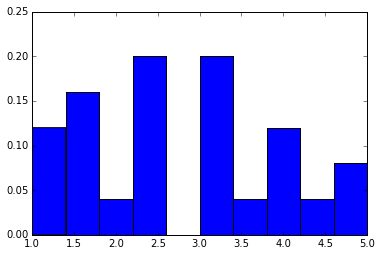

In [8]:
sampling(p,2)

Не очень похоже на нормальное. Возьмем n=10

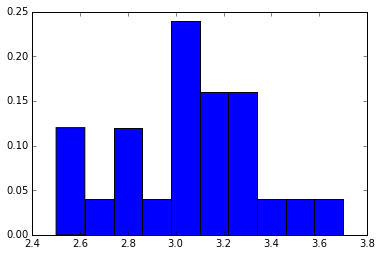

In [9]:
sampling(p,10)

Уже лучше. Теперь n=20.

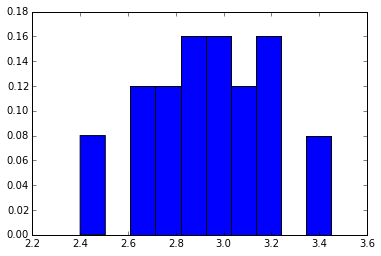

In [10]:
sampling(p,20)

Распределения становиться похожим на нормальное. Последнее попробуем выборки по 50 элементов.

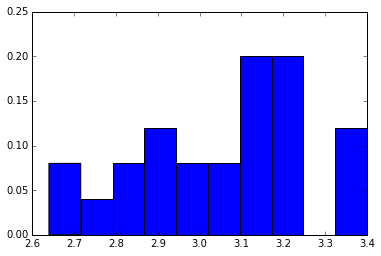

In [11]:
sampling(p,50)

Можете тоже поэкспереминтировать с этой функцией и убедиться, что центральная пределельная теорема рабоет. Но что же она нам дает? Очень многое на самом деле: зная, что распределение средних по выборке подчиняется нормальному закону, мы можем предсказывать это среднее! А зная то, что средние по выборке стремятся к среднему по совокупности, мы можем предсказывать среднее по совокупности, основываясь на данных выборки! В этом кстати заключается основной смысл статистики вывода - предсказывать параметры совокупности, основываясь на выборках. Давайте же перейдем к делу и будем уже что-нибудь предсказывать! Начнем с доверительных интервалов.

Доверительный интервал - это интервальная оценка параметра совокупности на основе выборки. У доверительного интрервала есть доверительный уровень, он выражется в процентах и означает вероятность того, что в интревальную оценку попадет параметр генеральной совокупности. Давайте попробуем понять, что значит доверительный интревал например 90%, используя график. Я создам нормальное распределение со средним = 0 и дисперсией = 1, а затем рассчитаю доверительный интервал 90%.

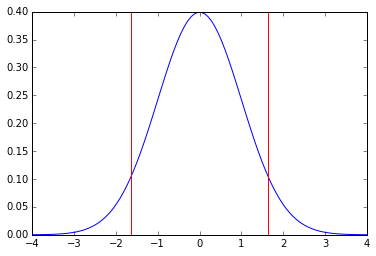

In [12]:
x = np.linspace(-4,4,100)
norm_d = stats.norm.pdf(x,0,sqrt(1))
z_c = stats.norm.ppf((1-0.9)/2)
plt.plot(x,norm_d)
plt.axvline(z_c,color='r')
plt.axvline(-z_c,color='r')

Вся соль в третьей строчке. Функция ppf это инверсия cdf. В учебниках это значение обычно определяют по таблицам нормального распределения. Но почему мы вычитаем доверительный уровень из единицы и делим его на 2? Что вернет функция ppf взятая от 0.9? Она возвращает верхнюю границу интервала, в который будет попадать случайная переменная с 90% вероятностью. Поскольку мы строим симметричный интревал относительно среднего, нам нужно ограничить 90% площади под кривой с двух сторон, поэтому и делим на 2.

Теперь приведу реальный пример определения доверительно интревала. Будем использовать созданную ранее популяцию p. Вопрос сформулируем так: определите доверительный интревал 90% для среднего имея выборку размером 31. Чтобы использовать нормальный закон распределения размер выборки должен быть >= 30. Возьмем выборку из 31 элемента и определим среднее и страндартное отклонение.

In [13]:
sample = p[np.random.randint(0,len(p),31)]
sample

array([5, 2, 4, 1, 1, 4, 4, 4, 3, 3, 4, 1, 4, 1, 1, 4, 5, 2, 1, 4, 5, 3, 4,
       4, 1, 3, 5, 1, 2, 4, 5])

In [14]:
np.mean(sample)

3.064516129032258

In [15]:
np.std(sample)

1.4576933584122587

Для определения доверитльного интервала используется стандартная ошибка среднего, которая рассчитывается следующим образом:

$$se = \frac{s}{\sqrt(n)}$$

где s - страндартное отклонение совокупности (может быть рассчитано или оценено, как стандартное отклонение выборки), n - размер выборки.

In [16]:
se = np.std(sample)/sqrt(len(sample))
se

0.26180945590005755

Теперь рассчитаем критическое значение z-score для 90% доверительного уровня.

In [17]:
z_c = abs(stats.norm.ppf((1-0.9)/2))
z_c

1.6448536269514729

Теперь наконец-то определим доверительный интервал. Делается это так.

In [18]:
# нижний уровень
np.mean(sample) - z_c * se

2.6338778959248565

In [19]:
# верхний уровень
np.mean(sample) + z_c * se

3.4951543621396595

Мы построили 90% доверительный интервал для среднего: 2.27 <= m <= 3.21.

Что же делать, когда размер выборки меньше 30 и стандартное отклонение совокупности не известно? Закон нормального распределния использовать нельзя, но можно использовать распределение Стьюдента, делая допущение, что совокупность имеет нормальное распределение. Распределение Стьюдента - это как бы обобщенное нормальное распределение, созданное чтобы предсказывать параметры совокупности на малых выборках. Оно зависит от степеней свободы. Степени свободы определяются как n-1, где n - размер выборки. Степени свободы, это количество элементов, которые можно спокойно менять. Представьте выборку из трех элементов со средним 10. Мы можем сказать что первый элемент будет например равен 12, второй элемент 11, а вот третий элемент уже обязательно должен быть равен 30 - 12 - 11 = 7, т.к. среднее = 10. У нас нем свободы выбора самим определить третий элемент. Чем больше степеней свободы, тем сильнее распределение Стьюдента похоже на нормальное. Доверительный интервал определяется таким же образом, что и в случаее с нормальным распределением, только вместо z-статистики используется t-статистика.

Ответим на следующий вопрос: постройте доверительный интервал 95% для среднего по нормально распределенной совокупности, имея выборку [2,3,1,5,3,2,4,1,3].

In [20]:
sample2 = [2,3,1,5,3,2,4,1,3]

Определим оценочную ошибку среднего. Почему оценочную? Потому, что стандартное отклонение совокупности нам не известно, и мы приближаем его к стандартному отклонению по выборке.

In [21]:
se = np.std(sample2)/sqrt(len(sample2))
se

0.41573970964154899

Вычислим критическое значение t статистики. Обратите внимание, что вторым агрументом t.ppf принимает степени свободы.

In [22]:
t_c = abs(stats.t.ppf((1-.95)/2,len(sample2)-1))
t_c

2.3060041350333704

Вычислим границы интервала.

In [23]:
# нижняя граница
np.mean(sample2) - t_c * se

1.7079691771356817

In [24]:
# верхняя граница
np.mean(sample2) + t_c * se

3.6253641561976515

Доверительный интревал 95% для среднего: 1.71 <= mean <= 3.63. Изобразим его так же и графически.

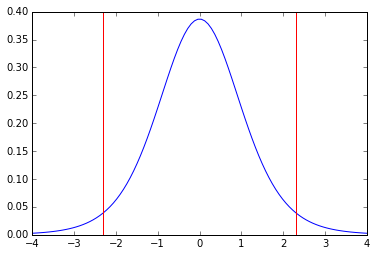

In [25]:
plt.plot(x,stats.t.pdf(x,len(sample2)-1))
plt.axvline(t_c,color='r')
plt.axvline(-t_c,color='r')

Мы на 95% уверены, что среднее по совокупности нахоидтся в интревале от 1.71 до 3.63.

Перейдем к проверке гипотез. По сути это тоже самое, что и доверительные интревалы, только в проверке гипотез мы смотрим, попало ли значение в доверительный интревал или нет, и на основе этого отклоняем или не отклоняем основную гипотезу. Основная гипотеза или нулевая гипотеза обозначается как H0 и формулируется следующим образом - утрерждается, что какой-либо параметр совокупности =, <=, >= определенного значения. Альтернативная гипотеза (или исследовательская) обозначается как H1 и формулируется как противоположность основной гипотезе, изпользуя утверждения <, > или !=. Гипотеза всегда проверяется на определенном уровне значимости a (альфа), который является вероятностью ошибки первого рода (отклонить основую гипотезу когда основная гипотеза истинна). Уровень значимости a это как раз 1 минус доверительный интревал определнного уровня. Проверка гипотезы может быть двух сторонней, когда формулирется как утверждение с равенством, и односторонней, когда используются утверждения типа >= или <=. Начнем с односторонней проверки.

Проверьте гипотезу о том, что среднее по совокупности равно 2 на уровне значимости a = 0.05, имея выборку n = 30 средним равным 2 и стандратным отклонением по совокупности = 0.5. Сформулирем основную и альтернативну гипотезы.

H0: m = 2,
H1: m != 2

Рассчитаем стандартную ошибку среднего.

In [26]:
se = 0.5/sqrt(30)
se

0.09128709291752768

Теперь определим критическое значение z-score использую значение a=0.05. Т.к. проверка гипотезы двухсторонняя (утверждение равенства) нам нужно построть двухсторонний (симметричный относительно среднего) доверительный интервал вокруг гипотетического среднего. Значит альфа будем делить на 2.

In [27]:
z_c = abs(stats.norm.ppf(.05/2))
z_c

1.9599639845400545

Теперь определим доверительный интервал для гипотетического среднего.

In [28]:
# нижняя граница
2 - z_c * se

1.8210805856282843

In [29]:
# верхняя граница
2 + z_c * se

2.1789194143717157

Теперь посмотрим попадает ли выборчное среднее в этот интервал.  Значение 2.1 попадает в интервал от 1.82 до 2.18, значит мы не отвергаем основную гипотезу.

Этот же вывод можно сделать с помощью z-статистики. Для этого нам нужно рассчитать z-score для выборочного среднего. Делается это так:

$$z = \frac{m(sample) - m(H0)}{se} $$

где m(H0) - гипотетическое среднее,
m(sample) - выборочное среднее,
se - страндартная ошибка среднего

In [30]:
z = (2.1-2)/se
z

1.0954451150103333

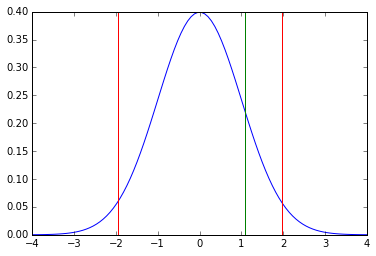

In [31]:
plt.plot(x,norm_d)
plt.axvline(z_c,color='r')
plt.axvline(-z_c,color='r')
plt.axvline(z,color='g')

Мы видим, что значение z-score для выборочного среднего попало в доверительный итрервал. Следоватльено мы не отклоняем основную гипотезу. Так же мы можем рассчитать значение p-value для выборочного среднего.

In [32]:
1 - stats.norm.cdf(z)

0.1366608391461489

p-value > a - соблюдение этого неравенства тоже позволяет нам не отклонять основную гипотезу. Очень часто различные функции в статистических пакетах на выходе дают значение p-value. Теперь мы знаем как его интрепретировать - чем больше значение p-value, тем с большей уверенностью мы не отклоняем основную гипотезу.

Теперь приведу пример с односторонней проверкой гипотезы. Допустим, что производитель утверждает, что изобрел батарейки, которые работают более 20 часаов. Было протестировано 40 батареек. Предположим стандартное отклонение совокупности равно 5.3 часа, а среднее по выборке получилось равно 22.5 часа. Нужно проверить гипотезу производителя на уровне значимости a = 0.01.

Сформулируем основную и альтернативную гипотезы:
H0: m <= 20;
H1: m > 20.

Почему так? Во первых потому, что основная гипотеза не может использовать строгое неравенство, а во вторых потому, что гипотеза производителя исследователькая, т.е. противоречит общепринятым знаниям о батарейках. Значит эта гипотеза альтернативная.

Поскольку гипотезы сформулированы как неравенства - это будет одностороння проверка. Значит мы не будем делить a на два, и интревал с одной стороны никак не будет ограничен. Когда альтернативная гипотеза сформулирована как > определенного значения, мы будем искать критическое значение справа от средрего. 

Сначала рассчитаем критическое значение z.

In [33]:
z_c = abs(stats.norm.ppf(.01))
z_c

2.3263478740408408

Теперь определим z-score для выборочного среднего.

In [34]:
z = (22.5 - 20)/(5.3/sqrt(40))
z

2.9832808114796032

Построим график.

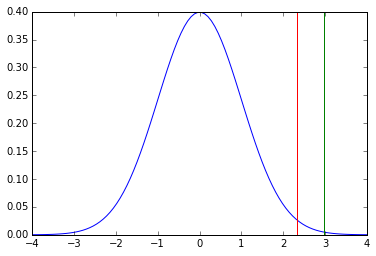

In [35]:
plt.plot(x,norm_d)
plt.axvline(z_c,color='r')
plt.axvline(z,color='g')

Мы видим, что зеленая линия оказалась слева от границы доверительного интревала и не попала в него, следовательно мы отклоняем основную гипотезу и принимаем альтернативную - утверждение производителя батареет имеет статистическое обоснование. Давайте рассчитаем p-value.

In [36]:
1 - stats.norm.cdf(z)

0.0014258810787186604

p <= a - это позволяет нам не принять основную гипотезу. Почему я вычитаю из единицы? Потому что меня интересует вероятность попадания случайной переменной в интревал справа от зеленой линии, а функция cdf всегда возвращает значение, которое меньше либо равно z, т.е. слева от зеленой линии. Опять же - значение p-value очень мало в данном случаее, и мы не можем позволить себе принять основную гипотезу. Обычно статистики используют пороговое значение a = 0.055. Теперь, когда увидите где-нибудь значение p-value сравнивайте его в уме с этой константой и решайте - отвергать или не отвергать вашу нулевую гипотезу.

Не буду писать о левосторонней проверки гипотезы - это тоже самое, только с другой стороны. Так же нужно понимать, что когда размер выборки меньше 30, для проверки гипотез нужно использовать распределение Стьюдента.

На сегодня наверное все. В следующем выпуске Статистика наизусть я расскажу о ти-тесте и чи-квадрате. Для более основательного изучения концепций приведенных в этом статьи рекомендую воспользоваться следующими ссылками:
1. [Книга: Доннелли Роберт - Статистика шаг за шагом](http://www.twirpx.com/file/1179942/).
2. [Лекции МГУ по статистике](http://msu-students.ru/Stat_lectures/).